<a href="https://colab.research.google.com/github/Bernstein7z/ScientificProgrammingPython/blob/main/assignment06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 6

In [99]:
import csv
import math
import numpy as np
import pandas as pd
import timeit

## Task 1
Implentation of RSME with buildin function and numpy.

In [100]:
def buildin_rsme(data: list, experimental_density: float) -> float:
    """ RSME buildin functions

        Args:
            data: list of simulated values
            experimental_density: float number of exprimental value
        
        Returns:
            The calculated RSME for the given data and experimental density value

    """
    return math.sqrt(sum([(x - experimental_density)**2 for x in data]) / len(data))


def numpy_rsme(data: list, experimental_density: float) -> float:
    """ RSME with numpy

        Args:
            data: list of simulated values
            experimental_density: float number of exprimental value
        
        Returns:
            The calculated RSME for the given data and experimental density value

    """
    return np.sqrt(np.square(np.subtract(data, experimental_density)).mean())

## Task 2
Read the data in form of csv file with pandas and drop the NaN values for further calculations.

In [101]:
row_data = pd.read_csv('density.csv').dropna()

## Task 3
Compute the mean and standard deviation of density data with pandas.

In [110]:
mean = row_data['Density'].mean()
std = row_data['Density'].std()

print(f'The mean value of the density data: {round(mean, 4)} g/cm^3')
print(f'The mean value of the density data: {round(std, 4)} g/cm^3')

The mean value of the density data: 0.9962 g/cm^3
The mean value of the density data: 0.0211 g/cm^3


## Task 4
Plot the density over the simulation time.

Text(0, 0.5, 'Density in g/cm^3')

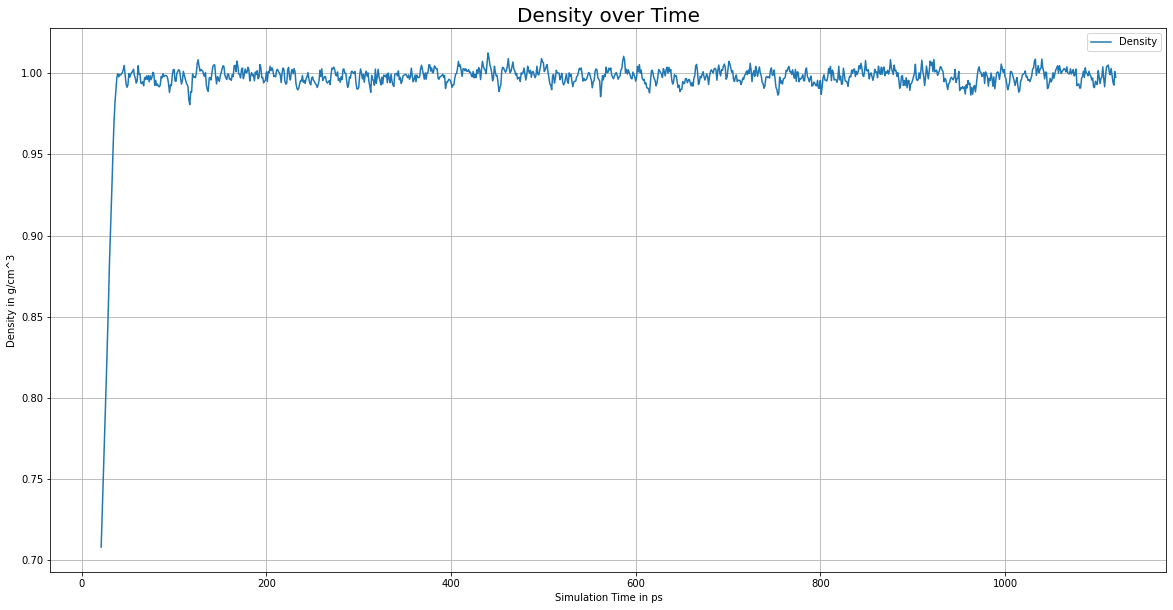

In [103]:
ax = row_data.plot(x='Time', y='Density', figsize=(20, 10), grid=True, title='Density over Time')

ax.title.set_size(20)
ax.set_xlabel('Simulation Time in ps')
ax.set_ylabel('Density in g/cm^3')

## Task 5
measurement of the two functions:

- `buildin_rsme`
- `numpy_rsme`

with `timeit` module.

In [104]:
data_density = row_data['Density'].tolist()

buildin_performance_time = timeit.timeit(lambda:buildin_rsme(data_density, .99510), number=1000)
numpy_performance_time = timeit.timeit(lambda:numpy_rsme(data_density, .99510), number=1000)

print(f'RSME performance time buildin functions implementation: {round(buildin_performance_time, 5)} seconds')
print(f'RSME performance time numpy implementation:             {round(numpy_performance_time, 5)} seconds')

RSME performance time buildin functions implementation: 0.11436 seconds
RSME performance time numpy implementation:             0.05745 seconds
